# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:

Gradient Boosting sequentially fits models, namely weak learners, on observations. Each (sequential) weak learner learns the residuals that the previous weak learner could not learn. A loss function is chosen for Gradient Boosting to optimize, and the method uses gradient descent in the function space to optimize. In Gradient Boosting, a variety of loss functions can be chosen. Gradient Boosting has the property of being an additive model as trees are added one at a time, and when that happens the gradient identifies the flaws of the previous models. While Gradient Boosting can overfit, it does reduce variance and bias. 

A major difference between Gradient Boosting and AdaBoost is that AdaBoost weights the observations the previous model missed where Gradient Boosting uses gradients in the loss function based on the residuals of the previous weak learner. Further AdaBoost assigns weights to each model's prediction, whereas Gradient Boosting does not weight models differently. 

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [9]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'
    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = (x0_max / x0_min)/100
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    plt.subplot(1, 1, 1)
    y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
    y_pred = y_pred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.xlim(xx0.min(), xx0.max())
    plt.title('SVC with {} kernel'.format(kernel))
    plt.show()

In [10]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

NameError: name 'train_model' is not defined

## Answer:

**a**

In [ ]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma)
    svc.fit(X, y)
    return svc

In [ ]:
svc = train_model(X, y)
plot_model(X, y, svc)

**b**

In [ ]:
svc = train_model(X, y, kernel='rbf')
plot_model(X, y, svc, kernel='rbf')

Here, we see that the decision boundaries are non-linear under the rbf kernel compared to the linear kernel. Interestingly, the rbf, non-linear kernel, is able to capture some of the class boundary nuance better. Qualitatively, this appears to better classify classes. 

**c**

In [ ]:
svc = train_model(X, y, kernel='rbf', gamma=0.5)
plot_model(X, y, svc, kernel='rbf')

In [ ]:
svc = train_model(X, y, kernel='rbf', gamma=1)
plot_model(X, y, svc, kernel='rbf')

In [ ]:
svc = train_model(X, y, kernel='rbf', gamma=10)
plot_model(X, y, svc, kernel='rbf')

In [ ]:
svc = train_model(X, y, kernel='rbf', gamma=100)
plot_model(X, y, svc, kernel='rbf')

As gamma increases, the decision boundaries become increasingly non-linear and separated out into different regions. It appears to better capture the classes even better as gamma increases. The class boundary fits are increasingly tighter, though, indicating possible overfitting. 

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('D:\\05_GitHub\\Data_Science_Projects\\Advanced_Machine_Learning\\spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## Answer:

**a**

In [14]:
# Decision Tree classifier 
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [15]:
# Logistic Regression Classifier
lr_clf = LogisticRegression(random_state=10, solver='newton-cg')
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='newton-cg')

In [16]:
# get predictions
dt_preds = dt_clf.predict(X_test)
lr_preds = lr_clf.predict(X_test)

# get probabilities
dt_probs = dt_clf.predict_proba(X_test)[:,1]
lr_probs = lr_clf.predict_proba(X_test)[:,1]

In [17]:
# Accuracy Scores
print('Decision Tree Accuracy: ', accuracy_score(y_test, dt_preds))
print('Logistic Regression Accuracy: ', accuracy_score(y_test, lr_preds))

Decision Tree Accuracy:  0.9098090849242922
Logistic Regression Accuracy:  0.9315339038841343


In [18]:
# ROC AUC Scores
print('Decision Tree ROC AUC Score: ', roc_auc_score(y_test, dt_probs))
print('Logistic Regression ROC AUC Score: ', roc_auc_score(y_test, lr_probs))

Decision Tree ROC AUC Score:  0.9040453749567611
Logistic Regression ROC AUC Score:  0.9734682742610166


**b**

In [19]:
# Decision Tree Bagging
dt_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10), n_estimators=50, random_state=10)
dt_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                  n_estimators=50, random_state=10)

In [20]:
# Logistic Regression Bagging
lr_bag = BaggingClassifier(base_estimator=LogisticRegression(random_state=10, solver='newton-cg'), n_estimators=50, random_state=10)
lr_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=10,
                                                    solver='newton-cg'),
                  n_estimators=50, random_state=10)

In [21]:
# get predictions
dt_preds = dt_bag.predict(X_test)
lr_preds = lr_bag.predict(X_test)

# get probabilities
dt_probs = dt_bag.predict_proba(X_test)[:,1]
lr_probs = lr_bag.predict_proba(X_test)[:,1]

In [22]:
# Accuracy Scores
print('Decision Tree Bagging Accuracy: ', accuracy_score(y_test, dt_preds))
print('Logistic Regression Bagging Accuracy: ', accuracy_score(y_test, lr_preds))

Decision Tree Bagging Accuracy:  0.9368005266622779
Logistic Regression Bagging Accuracy:  0.934167215273206


In [23]:
# ROC AUC Scores
print('Decision Tree Bagging ROC AUC Score: ', roc_auc_score(y_test, dt_probs))
print('Logistic Regression Bagging ROC AUC Score: ', roc_auc_score(y_test, lr_probs))

Decision Tree Bagging ROC AUC Score:  0.9796839729119637
Logistic Regression Bagging ROC AUC Score:  0.97552769248874


With Bagging, both the Decision Tree and Logistic Regression classifier have improved accuracy and ROC AUC scores. The benefits of bagging (variance reduction and model stability) are clear in the results.

**c**

In [24]:
params = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, params)
rf_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 100, 500], 'random_state': [42]})

In [25]:
# get predictions
rf_preds = rf_clf.predict(X_test)

# get probabilities
rf_probs = rf_clf.predict_proba(X_test)[:,1]

In [26]:
# Accuracy Score
print('Random Forest Accuracy: ', accuracy_score(y_test, rf_preds))
# ROC AUC Scores
print('Random Forest ROC AUC Score: ', roc_auc_score(y_test, rf_probs))

Random Forest Accuracy:  0.9552337063857801
Random Forest ROC AUC Score:  0.9891234188838844


**d**

In [27]:
# Gradient Boosting
gb_params = [{"n_estimators":[10, 100, 500], 
                     "learning_rate":[0.01, 0.1, 0.5], 
                     "max_depth":[3, 5, 10], 
                     "subsample":[0.5, 0.7, 1.0], 
                     "random_state":[42]}]
gb = GradientBoostingClassifier()
gb_clf = GridSearchCV(gb, gb_params)
gb_clf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.01, 0.1, 0.5],
                          'max_depth': [3, 5, 10],
                          'n_estimators': [10, 100, 500], 'random_state': [42],
                          'subsample': [0.5, 0.7, 1.0]}])

In [28]:
# AdaBoost
ab_params = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}
ab = AdaBoostClassifier()
ab_clf = GridSearchCV(ab, ab_params)
ab_clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [10, 100, 500], 'random_state': [42]})

In [29]:
# get predictions
gb_preds = gb_clf.predict(X_test)
ab_preds = ab_clf.predict(X_test)

# get probabilities
gb_probs = gb_clf.predict_proba(X_test)[:,1]
ab_probs = ab_clf.predict_proba(X_test)[:,1]

In [30]:
# Accuracy Scores
print('Gradient Boosting Accuracy: ', accuracy_score(y_test, gb_preds))
print('AdaBoost Accuracy: ', accuracy_score(y_test, ab_preds))

Gradient Boosting Accuracy:  0.9552337063857801
AdaBoost Accuracy:  0.9512837393021725


In [31]:
# ROC AUC Scores
print('Gradient Boosting ROC AUC Score: ', roc_auc_score(y_test, gb_probs))
print('AdaBoost ROC AUC Score: ', roc_auc_score(y_test, ab_probs))

Gradient Boosting ROC AUC Score:  0.9889094533537314
AdaBoost ROC AUC Score:  0.9858836241481498


**e**

In [32]:
rf_clf.best_params_

{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}

In [33]:
gb_clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'random_state': 42,
 'subsample': 1.0}

In [34]:
ab_clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}

In [35]:
models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']*3
accuracy_scores = []
roc_auc_scores = []
estimators= [10, 10, 10, 100, 100, 100, 500, 500, 500]
n_estimators= [10, 100, 500]
for n in n_estimators:
    rf = RandomForestClassifier(criterion='gini', random_state=42, n_estimators=n)
    gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, random_state=42, subsample=1, n_estimators=n)
    ab = AdaBoostClassifier(learning_rate=0.1, random_state=42, n_estimators=n)
    
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)
    ab.fit(X_train, y_train)
    
    # get predictions
    rf_preds = rf.predict(X_test)
    gb_preds = gb.predict(X_test)
    ab_preds = ab.predict(X_test)

    # get probabilities
    rf_probs = rf.predict_proba(X_test)[:,1]
    gb_probs = gb.predict_proba(X_test)[:,1]
    ab_probs = ab.predict_proba(X_test)[:,1]
    
    # accuracy scores
    accuracy_scores.append(accuracy_score(y_test, rf_preds))
    accuracy_scores.append(accuracy_score(y_test, gb_preds))
    accuracy_scores.append(accuracy_score(y_test, ab_preds))
    
    # roc auc scores
    roc_auc_scores.append(roc_auc_score(y_test, rf_probs))
    roc_auc_scores.append(roc_auc_score(y_test, gb_probs))
    roc_auc_scores.append(roc_auc_score(y_test, ab_probs))

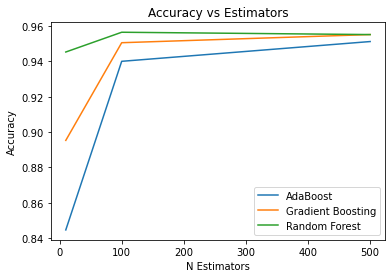

In [36]:
# accuracy score plot
accuracy_df = pd.DataFrame({'models':models, 'accuracy':accuracy_scores, 'roc_auc':roc_auc_scores, 'estimators':estimators})
accuracy_df.set_index('estimators', inplace=True);
accuracy_df.groupby('models')['accuracy'].plot(legend=True);
plt.title('Accuracy vs Estimators');
plt.xlabel('N Estimators');
plt.ylabel('Accuracy');

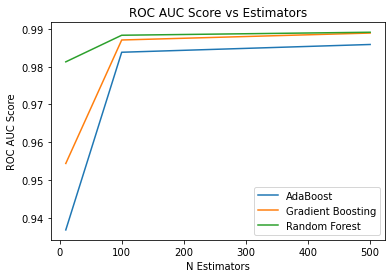

In [37]:
# roc auc score plot
roc_auc_df = pd.DataFrame({'models':models, 'accuracy':accuracy_scores, 'roc_auc':roc_auc_scores, 'estimators':estimators})
roc_auc_df.set_index('estimators', inplace=True);
roc_auc_df.groupby('models')['roc_auc'].plot(legend=True);
plt.title('ROC AUC Score vs Estimators');
plt.xlabel('N Estimators');
plt.ylabel('ROC AUC Score');